In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

## Data Preparation 

In [2]:
df = pd.read_csv('data_student.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [3]:
df.shape

(258, 6)

In [4]:
df.dtypes

STG     float64
SCG     float64
STR     float64
LPR     float64
PEG     float64
 UNS     object
dtype: object

In [5]:
df.isna().sum()

STG     0
SCG     0
STR     0
LPR     0
PEG     0
 UNS    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,STG,SCG,STR,LPR,PEG
count,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371147,0.355674,0.468004,0.432713,0.458539
std,0.210271,0.211962,0.245940,0.248108,0.255211
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240750,0.210000,0.291250,0.250000,0.250000
50%,0.327000,0.302500,0.490000,0.330000,0.500000
75%,0.495000,0.497500,0.690000,0.647500,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.930000


## Exploratory Data

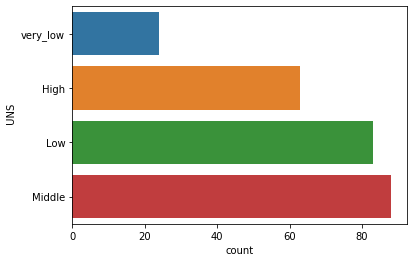

In [21]:
sns.countplot(y = ' UNS' , data = df)
plt.show()

Text(0.5, 1, 'UNS')

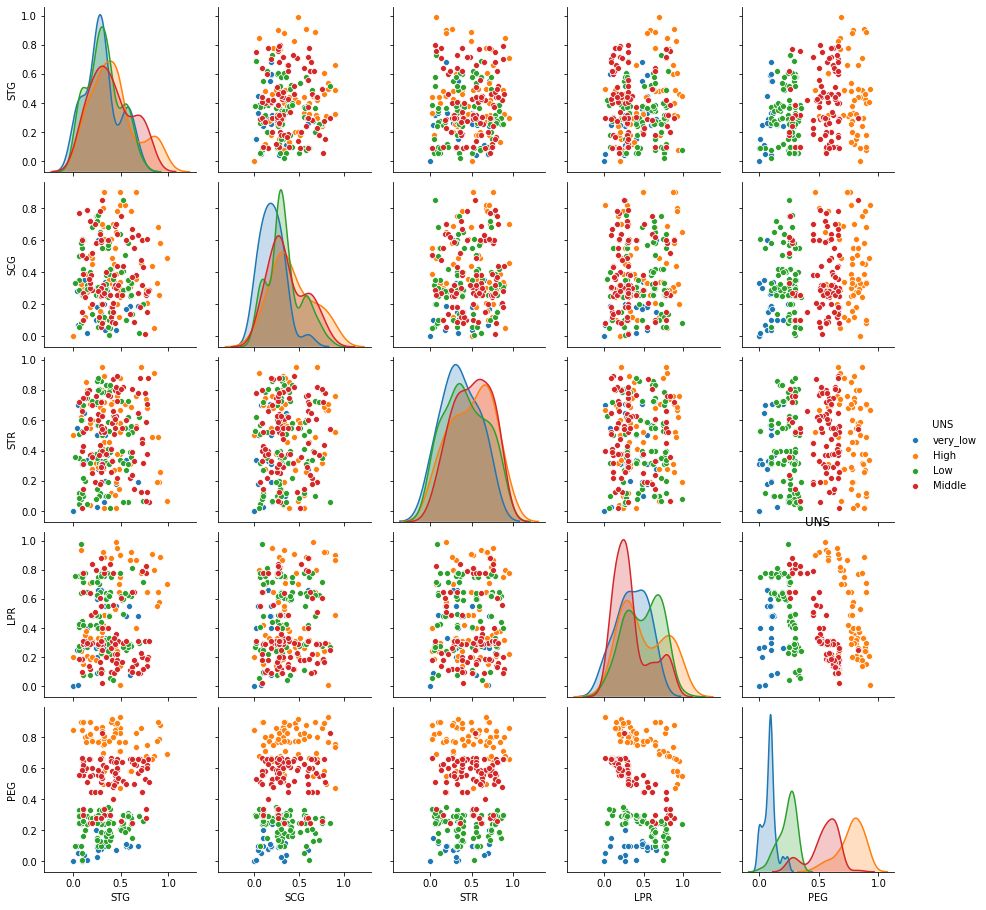

In [9]:
sns.pairplot(df, hue=" UNS")
plt.title("UNS")

## K-Means Clustering
### Find Optimum *k* using elbow method 

In [10]:
X = df[['STG' , 'PEG']].iloc[: , :].values
inertia = []
for n in range(1 , 10):
    models = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=100, 
                        tol=0.0001,  random_state= 100  ) )
    models.fit(X)
    inertia.append(models.inertia_)

The graph below tells us that the *k* value which is considered quite optimum to be used for clustering is *k* = 3.

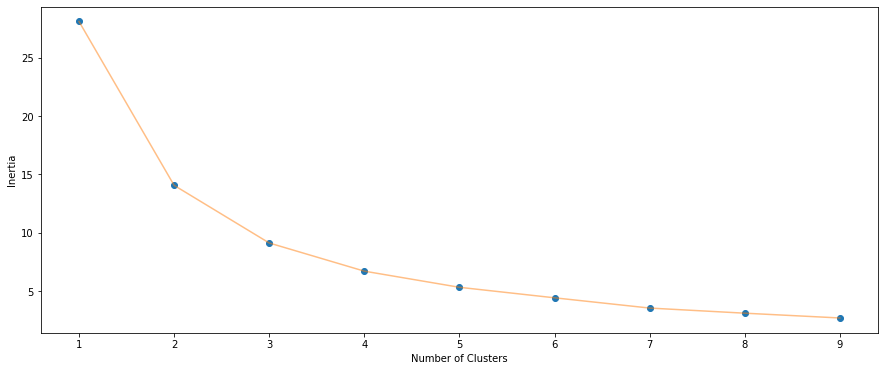

In [11]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 10) , inertia , 'o')
plt.plot(np.arange(1 , 10) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### Clustering and Visualization

Choosing the number *k* = 3, it means we will clustering users into 3 levels of user knowledge. 

In [12]:
models = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  ) )
models.fit(X)
labels = models.labels_
centroids = models.cluster_centers_

In [13]:
print(models.cluster_centers_)
print(models.inertia_)
print(models.n_iter_)

[[0.71452381 0.61690476]
 [0.30986325 0.21284615]
 [0.29789899 0.68171717]]
9.13228020868021
6


The model has an inertia value of 9.13. Inertia is sum of squared distances of samples to their closest cluster center. From information above, to achieve convergence this model requires 6 iterations.

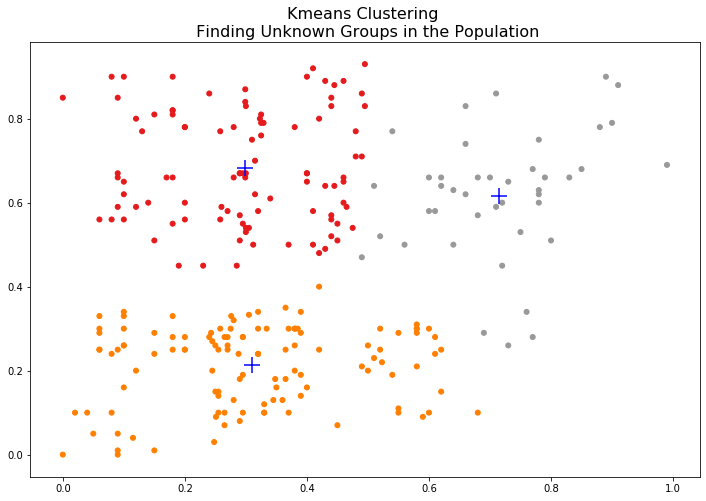

In [14]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=models.labels_, cmap="Set1_r", s=25)
plt.scatter(models.cluster_centers_[:,0] ,models.cluster_centers_[:,1], color='blue', marker="+", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

In [15]:
models2 = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
models2.fit(X)
labels2 = models2.labels_
centroids2 = models2.cluster_centers_
print(models2.cluster_centers_)

[[0.21311392 0.20788608]
 [0.29971134 0.68649485]
 [0.71810811 0.65594595]
 [0.51728889 0.24488889]]


In [16]:
print(models2.inertia_)
print(models2.n_iter_)

6.71909526266389
8


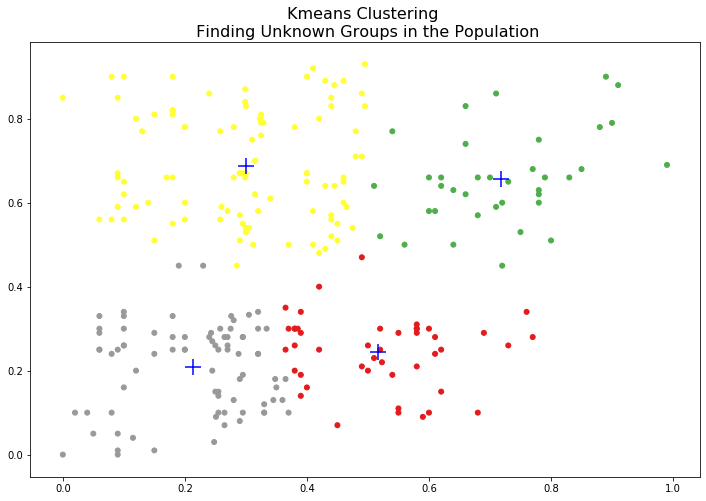

In [17]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=models2.labels_, cmap="Set1_r", s=25)
plt.scatter(models2.cluster_centers_[:,0] ,models2.cluster_centers_[:,1], color='blue', marker="+", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()